# Lab 02: Training with Epochs - Exercise

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### Download the data and print the sizes

In [2]:
data_path = "/Users/dongdongdongdong/Desktop/data"

In [3]:
train_data = torch.load(data_path + "/mnist/train_data.pt")
train_label = torch.load(data_path + "/mnist/train_label.pt")
test_data = torch.load(data_path + "/mnist/test_data.pt")
test_label = torch.load(data_path + "/mnist/test_label.pt")

### Make a ONE layer net class

In [4]:
class one_layer_net(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        self.linear_layer = nn.Linear( input_size, output_size , bias=False)
        
    def forward(self, x):
        scores = self.linear_layer(x)
        return scores

### Build the net

In [5]:
net = one_layer_net(784, 10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


### Choose the criterion, optimizer, batchsize, learning rate

In [6]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(net.parameters() ,lr=0.01)

bs = 50

## You only have stuff to do in this cell

### Do 15 passes through the training set

In [7]:
train_data.shape

torch.Size([60000, 28, 28])

In [8]:
for epoch in range(15):
    
    shuffled_indices = torch.randperm(60000)
    
    for count in range(0, 60000, bs):
        
        optimizer.zero_grad()
        
        indices = shuffled_indices[count : count+bs]
        minibatch_data = train_data[indices]
        minibatch_labels = train_label[indices]
        
        inputs = minibatch_data.view(bs, 784)
        inputs.requires_grad_()
        
        scores = net(inputs)
        
        loss = criterion(scores, minibatch_labels)
        loss.backward()
        optimizer.step()

### Choose image at random from the test set and see how good/bad are the predictions

In [10]:
import random

In [11]:
# choose a picture at random
idx = random.randint(0, 10000-1)
im = test_data[idx]

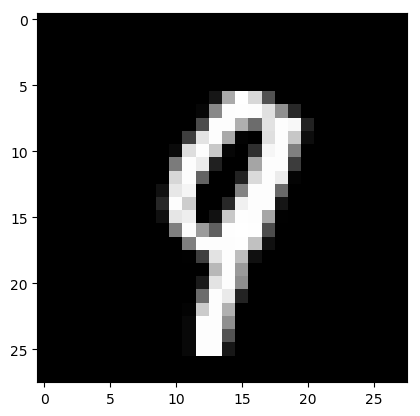

In [13]:
utils.show(im)

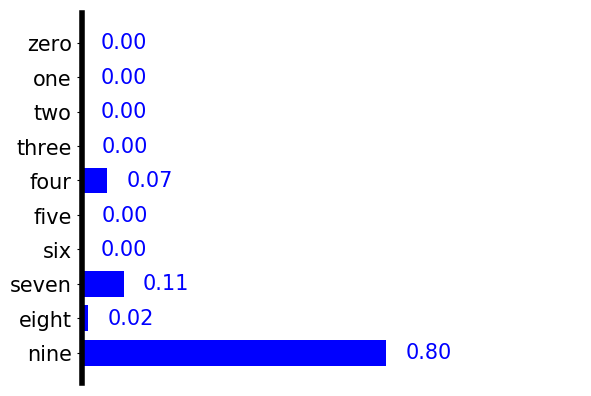

In [14]:
scores = net(im.view(1, 784))
probs = F.softmax(scores, dim=1)
utils.show_prob_mnist(probs)

In [16]:
test_label[idx]

tensor(9)